# Tutorial 01 - Intro to Keras models

## Step 1: imports etc

In general, your notebooks should start with a block like the one below.
It will prevent your notebook from pre-allocating 100% of the GPU memory, which will prevent other notebooks from running.
You can, however, change the assignment of `CUDA_VISIBLE_DEVICES` to select a different GPU. Currently valid options are `'0'` or `'1'`, for the Titan X GPUs. If you want to change this, you will have to restart the notebook kernel.

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

Next, we'll import some very common tools that are used often (even if we're not doing anything with neural networks).

In particular, numpy enables the use of efficent array processing and includes many mathematical functions, and matplotlib lets us do some graphical plotting.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Next, we will import Keras, and we will also directly import a few particular things from (sub)modules, for convenience.
These general items will almost always be needed; there are many other things in Keras that you may also need depending on what you are doing.

In [3]:
import keras
import keras.backend as K
import keras.layers as layers
from keras.models import Model

Using TensorFlow backend.


In this particular notebook, we're going to import one of the example datasets using a convenience package from Keras.
It is the famous MNIST handwritten digit dataset.

In [4]:
from keras.datasets import mnist

## Step 2: Getting the data
(Note that if it's your first time using this tool, it will take a moment to download some files in the background when you run the next line.)

The Keras tool returns something kind of funky.
It is a 2-tuple (kind of like a list with 2 elements).
Each element of the 2-tuple is also a 2-tuple.
The first one contains the training data, and the second one contains validation data.
Each of the tuples has the `X` dataset (the input images) as the first element, and the `y` data (the target labels) as the second element.
You can name them whatever you want in the notebook, but `X` and `y` are common terms for them.

Here is a fancy _pythonic_ way to unpack this result:

In [5]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()

If this is confusing, it might help to note that the following code does the exact same thing (but in a much more verbose way).
It's pretty common in python to return multiple things from a function using tuples, so I suggest getting used to the above method :)

In [6]:
mnist_data = mnist.load_data()

train_data = mnist_data[0]
val_data = mnist_data[1]

X_train = train_data[0] # or this could be, e.g., mnist_data[0][0]
y_train = train_data[1] #                         mnist_data[0][1]   ... etc.

X_val = val_data[0]
y_val = val_data[1]

## Step 3: Understanding the data

Now that we've got the data loaded up, it's always a good idea to poke and prod at it a bit, to make sure we understand it before trying to actually do anything with it.

All four of the variables we unpacked above are numpy arrays.
You can look at it in its raw form (which is usually truncated for large arrays) by simply typing the variable name in a cell:

In [7]:
X_val

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

There are lots of zeros, and nested arrays, but it's hard to really tell what's going on.
Let's look at the shape of the different arrays:

In [8]:
print("X_train shape:", X_train.shape)
print("X_train dtype:", X_train.dtype)
print()
print("y_train shape:", y_train.shape)
print("y_train dtype:", y_train.dtype)

X_train shape: (60000, 28, 28)
X_train dtype: uint8

y_train shape: (60000,)
y_train dtype: uint8


In [9]:
print("X_val shape:", X_val.shape)
print("X_val dtype:", X_val.dtype)
print()
print("y_val shape:", y_val.shape)
print("y_val dtype:", y_val.dtype)

X_val shape: (10000, 28, 28)
X_val dtype: uint8

y_val shape: (10000,)
y_val dtype: uint8


So, we can see that the `X_train` array is a list of 60,000 28x28 arrays (i.e., 28x28 images).
The `y_train` array is simply a list of 60,000 numbers. We also see there are 10,000 examples in the validation data.

The data type is `uint8`, which means an 8-bit unsigned integer. In other words, numbers between 0-255.

Let's probe a bit further. There's an easy way to visualize 2D arrays using matplotlib's `imshow` function. `X_train` is a 3D array, but we can pick out just the first 2D image using `X_train[0]`:

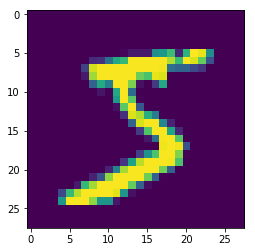

In [10]:
plt.imshow(X_train[0])

It looks like the number 5! Let's have a look at the corresponding entry of `y_train`:

In [11]:
y_train[0]

5

As expected, the `y_train` dataset lists 5 as the expected answer for this image.
We could use this information to train a neural network to predict the number written in a given image, which is a classic example problem.
for now we're going to just play with some of these datasets by manipulating them with keras.

## Step 4: Feeding data into a Keras model

Before we jump into building and training neural networks, let's just focus on a creating a very simple Keras model to illustrate how data goes into a network, and how the network manipulates the data.

**Note:** Many of the following cells will start with `K.clear_session()`. What this does is delete all of the tensors that have been created by Keras in the GPU. It just helps prevent cluttering the names and keep the GPU getting bogged down by excess memory use, but it will destroy whatever network you have built/trained unless it was saved to disk. This only affects stuff created by the instance of Keras running in this notebook.

Generally, your Keras model will start with an input layer, which will then feed in to one or more downstream layers.

When building models in Keras, there are two concepts to keep in mind: **Layers** and **Tensors**.

A **Layer** is an abstraction provided by Keras, that represents a mathematical operation (or some kind of transformation of the data).
It also keeps track of where the data comes from and where it goes.
For example, the very common `Dense` layer represents a dense (a.k.a. fully-connected) neural network layer.
The details are mathy, but a dense layer transforms input data by mutiplying the inputs by a matrix of (trainable) weights, adding to it a vector of (trainable) bias offsets, and applying some kind of nonlinearity; let's not worry too much about that for now!

The `Input` layer is a special layer that acts as a placeholder for input data (e.g. that you might provide in the form of a numpy array), and feeds that data into any other layers that are connected to it.

A **Tensor** is the actual underlying chunk of memory that represents the data on the GPU.
Generally a layer takes as input a tensor, and returns as output a different tensor (which contains data that was somehow transformed by the layer).
Sometimes we will want to write our own custom layers that operate on the tensor directly.

---

Okay, so lets jump right in and make a _very_ simple Keras model that does something kind of stupid:

In [12]:
K.clear_session()

model_input = layers.Input(shape=(1,))

add_layer = layers.Add()

model_output = add_layer([model_input, model_input])

model = Model(model_input, model_output)

Okay, what have we done?
On `line 1`, we used an input **layer** to create the **tensor** `model_input`, which acts as the "starting point" for our data.
For the input layer, we must specify the shape of the data.
When describing shapes to Keras, you always ignore the "batch dimension", which is generally the first dimension of a dataset.
That's because Keras assumes this size will be variable; i.e., you may feed it only a batch of 64 examples, or you may feed it the full 60,000 examples in the dataset.
Here, we specify `shape=(1,)`, so really we are saying the input data will be shaped like `(n,1)`.
Recall that `y_train` is simply a 1D array that has a shape of `(60000,)`, which as a special case (applying only to 1D input tensors), keras will treat as `(60000,1)`; in general, your input data has to have at least two dimensions, to account for the batch dimension.

On `line 3`, we created an _instance_ of the built-in `Add` layer.
Keras layers need to be instantiated as class objects; in this case you do not need to specify any arguments to create the `Add` layer, but sometimes you do and the arguments would go in the parentheses.
Once a layer is instantiated, you can use it kind of like a function to apply it to some input tensor(s).
It will connect the layer to the input tensor(s), apply its transformation, and return an output tensor.
The only exception is the `Input` layer, which does not take any tensor as input, it simply returns a tensor that acts as a placeholder/starting point for any data that you will feed into the network.

The `Add` layer expects a list of one or more input tensors.
On `line 5`, we simply give it the `model_input` sensor twice. So, the output will be `model_input` added to itself... in other words, this model simply multiplies the input by two!

Finally, on `line 9` we create a complete Keras model by using the `Model` class. The two arguments are the starting and ending point for the data.
Keras will automatically create a graph of all the tensors flowing from the starting point (`model_input`) to the ending point (`model_output`).

Keras can generate a nicely-formatted report of the model design, which is often useful:

In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
add_1 (Add)                     (None, 1)            0           input_1[0][0]                    
                                                                 input_1[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


Now let's try running some data through our network.
For this, we use the `predict` function, which takes some kind of data (usually a numpy array) and loads that data into the input tensor.
This input tensor is then fed into any layers connected to it, which updates the values of the respective output tensors, and so on, until the value of the final output tensor has been calculated.
The value of the output tensor is then returned (again, typically as a numpy array).

In [14]:
print("y_train shape:", y_train.shape)
result = model.predict(y_train)
print("result shape:", result.shape)

y_train shape: (60000,)
result shape: (60000, 1)


Note that the resulting tensor has a shape of `(60000,1)`.
This is because, as mentioned above, Keras treats 1D inputs as a special case, converting `(N,)` into `(N,1)`.
Keras has its reasons for always wanting to work with at least 2D tensors, but having this extra dimension can be annoying.
For example, to get the second element of the array, we have to do something like `result[1][0]`.
We can use the numpy array's `squeeze` function to remove any extra size-1 dimensions:

In [15]:
result_squeezed = result.squeeze()
print("result_squeezed shape:", result_squeezed.shape)

result_squeezed shape: (60000,)


Okay, now that we have the result as just a "normal" array, let's have a look at it!
Using numpy's "array slice" syntax (we'll make extensive use of this), we'll print the first 10 elements of the input and output data.
We can also check that the first ten elements are in fact the double of the inputs.

In [16]:
print(y_train[:10])
print(result_squeezed[:10])
print(result_squeezed[:10] == 2*y_train[:10])

[5 0 4 1 9 2 1 3 1 4]
[10.  0.  8.  2. 18.  4.  2.  6.  2.  8.]
[ True  True  True  True  True  True  True  True  True  True]


## Step 5: Slightly more complicated models

Okay, that Keras model was super simple.
And note that it's NOT a neural network!
There is nothing for this network to "learn", and as the summary above shows, there zero trainable parameters.
This model simply applies a computational rule on its inputs, and outputs the results.

Although Keras (and tensorflow, which Keras is built on top of) is designed to model neural networks, it's important to understand that really everything is just a computational graph that models how data flows through various computations/transformations.

The only difference between our simple computational graph and a neural network is that the computations performed by a NN generally depend on some variable parameters (often thousands or millions of them!)
The entire problem of training a neural network is to determine the values of those parameters in such a way that the NN computes something useful.

For now, let's just play a little bit more with Keras graphs before we worry about adding trainable parameters.

Very often, you will see that I name intermediate tensors something like `H` (for hidden) or `X,w,z`.
That's because the python name that we give to a particular tensor or layer is irrelevant to Keras; as soon as a tensor is connected to a layer, Keras internally adds that tensor to its computation graph, and will remember the tensor, even if you later assign that python variable to something else.

Let's illustrate this by creating a function that builds a Keras model that has a variable number of layers:

In [17]:
def mk_model(n_layers):
    K.clear_session()
    
    model_input = layers.Input((1,))
    
    add_layer = layers.Add()
    
    # I am using "H" as an alias for the `model_input` tensor.
    H = model_input
    
    for i in range(n_layers):
        # after the first iteration of this loop,
        # H will now refer to the output of the add_layer operation.
        H = add_layer([H, model_input])
    
    model_output = H
    
    model = Model(model_input, model_output)
    
    return model

Stop for a moment and try to figure out what the model will do, say if `n_layers=1`.
What if `n_layers=3`?

Let's try!

In [18]:
model = mk_model(1)

model.summary()

print(model.predict(y_train[:10]).squeeze())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
add_1 (Add)                     (None, 1)            0           input_1[0][0]                    
                                                                 input_1[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________
[10.  0.  8.  2. 18.  4.  2.  6.  2.  8.]


In [19]:
model = mk_model(3)

model.summary()

print(model.predict(y_train[:10]).squeeze())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
add_1 (Add)                     (None, 1)            0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 add_1[0][0]                      
                                                                 input_1[0][0]                    
                                                                 add_1[1][0]                      
                                                                 input_1[0][0]                    
Total para

I would like to quickly make one more point about instantiating layers, and re-using them.

In the previous two examples, we had a line like:
```
add_layer = Add()
```

This allows us to re-use the `Add` layer however many times we want.
This is fine, because one `Add` layer is exactly the same as any other.

However, very often when building neural networks, you want to be careful to create new layers for different parts of the network.
This is because, for example, all the weights of a `Dense` layer will be the same, wherever that layer is applied.
Sometimes (but infrequently) this is useful, e.g. if you want to force the exact same neural computation to occur at two places within the network.
More commonly, every layer of the nerual network is assumed to have its own set of weights, so a new _instance_ of the layer must be created each time.

Generally, when this is the case, we do not bother to name the instantiated network.
Instead, you can simply instantiate a layer and apply it to a tensor at the same time (which looks kind of weird since it has two sets of parenthesis).

Let's illustrate this by re-writing the above model in this way:

In [20]:
def mk_model(n_layers):
    K.clear_session()
    
    model_input = layers.Input((1,))
        
    # I am using "H" as an alias for the `model_input` tensor.
    H = model_input
    
    for i in range(n_layers):
        # after the first iteration of this loop,
        # H will now refer to the output of the add_layer operation.
        H = layers.Add()([H, model_input])
    
    model_output = H
    
    model = Model(model_input, model_output)
    
    return model

In [21]:
model = mk_model(3)

model.summary()

print(model.predict(y_train[:10]).squeeze())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
add_1 (Add)                     (None, 1)            0           input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
add_2 (Add)                     (None, 1)            0           add_1[0][0]                      
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
add_3 (Add

Note that now in the summary there are three different `Add` layers in the network, and they connect to fewer tensors each.
Of course it's kind of pointless to instantiate multiple `Add` layers, since they're all fundamentally the same, but it can make the code a bit cleaner and even makes the model summary a bit easier to understand.

## Step 6: Mutiple inputs

Okay, let's get a bit more complicated still: Keras models can have an arbitrary number of inputs and outputs.
Let's illustrate this by again using the `Add` layer.

Again, pause and try to figure out what this network is going to do before moving on...

In [22]:
def mk_model():
    K.clear_session()
    
    model_input1 = layers.Input((28,28))
    model_input2 = layers.Input((28,28))
        
    model_output = layers.Add()([model_input1, model_input2])
    
    model = Model([model_input1, model_input2], model_output)
    
    return model

In [23]:
model = mk_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
add_1 (Add)                     (None, 28, 28)       0           input_1[0][0]                    
                                                                 input_2[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


This time we have created _two_ input layers.
This time, the input shape is `(28,28)`. Recall that the shape of `X_train` is `(60000,28,28)`.

These two layers are passed to an `Add` layer, and the resulting tensor is returned as the model output.
Note that `Add` will sum together tensors of the same shape in an element-wise fashion.
For example adding 2x2 tensors looks like:
```
[ a b ]   [ e f ]   [ a+e b+f ]
[ c d ] + [ g h ] = [ c+g d+h ]
```

Note that it will do this element-wise summation for each element of the batch-axis independently (i.e. each of the 60000 images would be treated as its own 28x28 array summation).
This is kind of illustrating why Keras generally suppresses the batch-axis of the tensors when referring to shape.

---

Okay, so let's have a look at what this model does.
We will supply as input the first 5 images from `X_train` and `X_val`.
Note that this is done by giving the two input datasets together in a list (`[]`) to the `predict` function.

In [24]:
result = model.predict([X_train[:5], X_val[:5]])
print(result.shape)

(5, 28, 28)


We can use the (kind of annoyingly complicated) `subplot` feature of matplotlib to nicely illustrate what's going on here.
The first column is the data from `X_train`, which is passed to `model_input1`.
The second colum is the data from `X_val`, which is passed to `model_input2`.

The third column is the output of the Keras model! Weird, but hopefully illustrative.

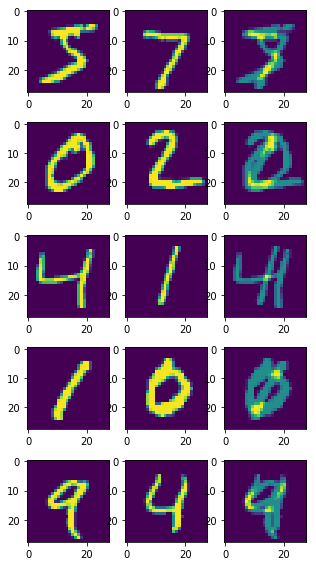

In [25]:
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,3,3*i+1)
    plt.imshow(X_train[i])
    plt.subplot(5,3,3*i+2)
    plt.imshow(X_val[i])
    plt.subplot(5,3,3*i+3)
    plt.imshow(result[i])

## Step 7: Multiple outputs / unnecessarily complicated example

Okay, let's do an example of a model with multiple inputs and outputs. Please note that the example is really quite complicated, and is bordering on abuse of the Keras framework. At the very least, things like this should be done by implementing custom Keras layers, rather than trying to shoehorn the operations into the Keras built-ins. Have a look just for fun, but don't be discouraged if it's very confusing :)

I am also going to introduce a few layers, including the `Lambda` layer, which allows you to write apply simple mathematical transformations directly on the tensors.
When using the lambda layer, the object being manipulated is actually a _tensorflow_ tensor object.
It is generally pretty similar to a numpy array, and you must be careful to account for the batch axis (which is suppressed for Keras tensors, but not tensorflow tenors).
There are also "backend" functions that can be used when manipulating tensorflow tensors directly, such as `K.sum()` and `tf.sin()`.

Note also that I have sprinkled statements like `print(img.shape)` throughout the model-building function.
These can be really helpful to design complicated networks when tensors change shape often and/or need to conform to some other tensors' shape.

In [26]:
def mk_model():
    K.clear_session()
    
    model_input1 = layers.Input((28,28))
    model_input2 = layers.Input((1,))
    
    # scale the input image to range from 0.0-1.0, rather than 0-255.
    img = layers.Lambda(lambda x: x/255.)(model_input1)
    print(img.shape)
    
    # What's this do?
    sum_pixels = layers.Lambda(lambda x: K.sum(x, axis=(1,2)))(img)
    print(sum_pixels.shape)
    
    # For later purposes, we need an extra dimension on the image data.
    # Note that this is basically the opposite of the `squeeze()` function
    # that was mentioned early on in this tutorial.
    img = layers.Reshape((28,28,1))(img)
    print(img.shape)
    
    # Doing this because I want the input labels to confrom to the same
    # number of dimensions as the image data.
    labels = layers.Reshape((1,1,1))(model_input2)
    print(labels.shape)
    
    # What the heck is this doing?
    channel_red = layers.Lambda(lambda x: x[0] * ((x[1]+0)%3)/2.)([img, labels])
    print(channel_red.shape)
    channel_green = layers.Lambda(lambda x: x[0] * ((x[1]+1)%3)/2.)([img, labels])
    print(channel_green.shape)
    channel_blue = layers.Lambda(lambda x: x[0] * ((x[1]+2)%3)/2.)([img, labels])
    print(channel_blue.shape)
    
    # Note that by default, the Concatenate layer will combine
    # tensors according to their last axis.
    img_colored = layers.Concatenate()([channel_red, channel_green, channel_blue])
    print(img_colored.shape)
    
    model = Model([model_input1, model_input2], [img_colored, sum_pixels])
    
    return model

In [27]:
model = mk_model()
result_a,result_b = model.predict([X_val, y_val])

print("result_a shape:", result_a.shape)
print("result_b shape:", result_b.shape)

(?, 28, 28)
(?,)
(?, 28, 28, 1)
(?, 1, 1, 1)
(?, 28, 28, 1)
(?, 28, 28, 1)
(?, 28, 28, 1)
(?, 28, 28, 3)
result_a shape: (10000, 28, 28, 3)
result_b shape: (10000,)


I don't expect you to easily understand **HOW** all of that junk worked.
But, can you figure out **WHAT** exactly it has done?

I have fed the full set of validation images and labels into the model, and it returned two tensors.
The first one is a set of 10000 28x28x3 images. The second is a just list of 10000 numbers.

As a hint... we can use matplotlib's `imshow()` function to plot `NxNx3` image data as well. Let's see what that looks like, for the first few:

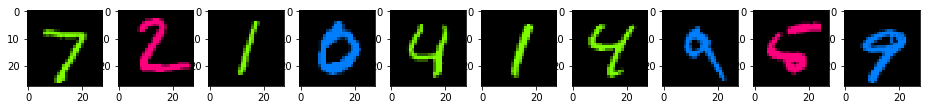

In [28]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(result_a[i])

Any ideas? What exactly has this crazy network done to the input images?

Now let's have a look at a few of the numbers in `result_b`:

In [29]:
result_b[:20]

array([ 72.36864 , 113.13727 ,  38.70981 , 145.15295 ,  75.439224,
        54.333336,  83.07452 ,  82.596085, 120.5255  , 122.941185,
       116.70981 , 108.76471 ,  89.73726 , 115.32158 ,  63.52549 ,
        85.56079 ,  90.047066,  88.89413 , 138.95294 ,  62.878437],
      dtype=float32)

Looks a whole lot of kind of random numbers...

A great technique to visualize long lists of numbers is with a _histogram_:

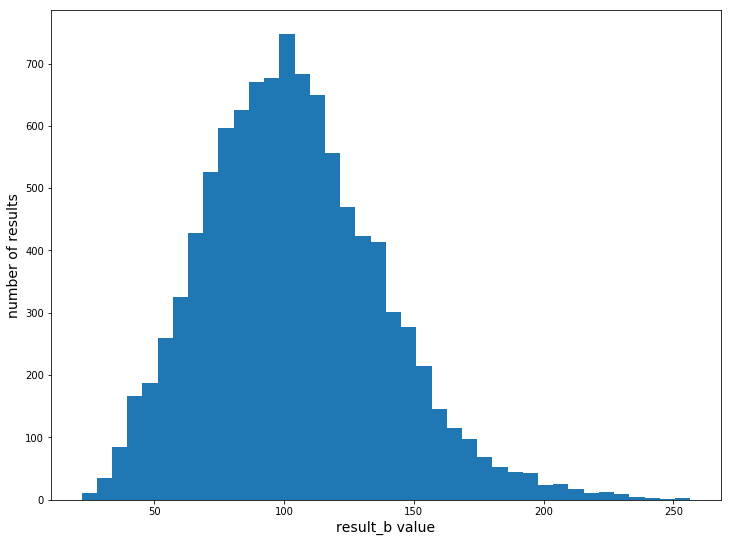

In [30]:
plt.figure(figsize=(12,9))
plt.hist(result_b, bins=40)
plt.ylabel('number of results', fontsize=14)
plt.xlabel('result_b value', fontsize=14);

Another nice trick in numpy is to use fancy array indexing... with this, we can use one array to select values from another.

For example, I can select the values from `result_b` for which the original value of `y_val` was zero:

In [31]:
result_b[y_val==0][:10]

array([145.15295 , 116.70981 , 115.32158 , 207.27454 , 134.98041 ,
       107.47451 , 113.32158 , 163.25099 , 104.705894, 114.41177 ],
      dtype=float32)

Let use this trick to look at the histogram of `result_b` values for each of the different numbers...

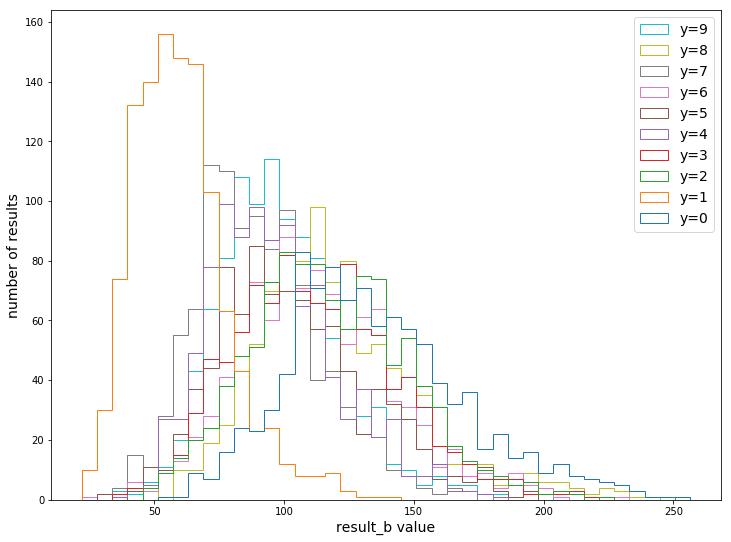

In [32]:
plt.figure(figsize=(12,9))
plt.hist([result_b[y_val==i] for i in range(10)], bins=40, histtype='step',label=['y=%d'%i for i in range(10)]);
plt.legend(fontsize=14)
plt.xlabel('result_b value', fontsize=14)
plt.ylabel('number of results', fontsize=14);

In this figure, each different-colored histogram represents the distribution of `result_b` values for a different value of `y_train`.

What can you make of this result?

# Part 8: Some common pitfalls

Here are a few examples of common pitfalls. Can you explain what's going on?

In [33]:
def mk_model():
    K.clear_session()
    
    model_input1 = layers.Input((28,28))
    model_input2 = layers.Input((28,28))
        
    model_output = layers.Add()([model_input1, model_input2])
    
    model = Model(model_input1, model_output)
    
    return model

In [34]:
model = mk_model()
model.summary()

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_2:0", shape=(?, 28, 28), dtype=float32) at layer "input_2". The following previous layers were accessed without issue: ['input_1']

In [35]:
def mk_model():
    K.clear_session()
    
    model_input = layers.Input((1,))
    
    model_output = layers.Add()(model_input, model_input)
        
    model = Model(model_input, model_output)
    
    return model

In [36]:
model = mk_model()
model.summary()

TypeError: __call__() takes 2 positional arguments but 3 were given

In [37]:
def mk_model():
    K.clear_session()
    
    model_input1 = layers.Input((28,28))
    model_input2 = layers.Input((28,28))
        
    model_output = layers.Add()([model_input1, model_input2])
    
    model = Model([model_input1, model_input2], model_output)
    
    return model

In [38]:
model = mk_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
add_1 (Add)                     (None, 28, 28)       0           input_1[0][0]                    
                                                                 input_2[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


In [39]:
model.predict([X_train, y_train])

ValueError: Error when checking input: expected input_2 to have 3 dimensions, but got array with shape (60000, 1)

In [40]:
def mk_model():
    K.clear_session()
    
    model_input = layers.Input((1,))
    
    model_output = layers.Reshape((1,1))
        
    model = Model(model_input, model_output)
    
    return model

In [41]:
model = mk_model()
model.summary()

ValueError: Output tensors to a Model must be the output of a Keras `Layer` (thus holding past layer metadata). Found: <keras.layers.core.Reshape object at 0x7fefbc0bc7b8>